#  <center> Conception d'une application au service de la santé publique 

<font size = 4 pt> Dans ce notebook, nous allons traiter le le jeu de donnée afin de repérer les variables pertinentes pour les traitements et l'exploration à venir des données en vue d'élaborer une application en lien avec l'alimentation

## Etape 1 : Importer les différentes librairies et datas

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',200)

<font color = 'blue'><b> Configuration des différents graphiques <font>

In [2]:
plt.rcdefaults()
font_title = {'color': 'blue','weight': 'bold','size': 12}
font_label = {'size': 10}
font_ticks = 10
font_legend = 8
c = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
colors = { x+1 : c[x]  for x in range(len(c))} 

In [3]:
DF = pd.read_csv('Dataset_brut.csv',delimiter='\t',encoding='UTF-8', low_memory=False)

## Etape 2 : Observation générale du jeu de donnée 

In [4]:
print('le dataset comporte {} lignes et {} variables'.format(DF.shape[0],DF.shape[1]))
DF.sample(2)

le dataset comporte 2031090 lignes et 187 variables


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,soluble-fiber_100g,insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
1722406,80380160,http://world-en.openfoodfacts.org/product/8038...,kiliweb,1622048808,2021-05-26T17:06:48Z,1622048809,2021-05-26T17:06:49Z,Stracchino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:it,en:italy,Italy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,171.0,715.0,NaN,11.0,7.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [5]:
DF.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2031090 entries, 0 to 2031089
Data columns (total 187 columns):
 #    Column                                                 Non-Null Count    Dtype  
---   ------                                                 --------------    -----  
 0    code                                                   2031090 non-null  object 
 1    url                                                    2031090 non-null  object 
 2    creator                                                2031086 non-null  object 
 3    created_t                                              2031090 non-null  int64  
 4    created_datetime                                       2031090 non-null  object 
 5    last_modified_t                                        2031090 non-null  int64  
 6    last_modified_datetime                                 2031090 non-null  object 
 7    product_name                                           1948279 non-null  object 
 8    abbreviate

###  2.1 Taux de valeurs renseignés au sein des variables
<p align="justify"><b>&emsp;&emsp;Il s'agit d'oberver le taux de valeurs renseignés dans les différentes variables du jeu de donnée.

In [6]:
# Calcul du taux de remplissage des variables du dataset + seuil  

def Taux_non_nuls(DF, seuil = 0 , PRINT = 'no_print') :
# Comptage des valeurs non nulles dans les différentes colonnes 
    Nb_rows , Nb_cols = DF.shape
    Taux_data_non_nuls = (100-100*(DF.isnull().sum()/Nb_rows))
    Taux_data_non_nuls = Taux_data_non_nuls.sort_values(ascending=False).reset_index()
    Taux_data_non_nuls.columns = ['variables', '% non nuls']
    
    # filtre avec seuil
    Taux_data_non_nuls = Taux_data_non_nuls[Taux_data_non_nuls['% non nuls']>=seuil]
    Percent_keep_cols = round( 100*len(Taux_data_non_nuls)/Nb_cols , 2 )
    print(f'{Percent_keep_cols}% des colonnes, soit {len(Taux_data_non_nuls)} ont un taux de remplissage >= {seuil}%')     

    # Tracer du graphique en barre    
    if PRINT == 'print': 
        fig = plt.figure(figsize=(15, len(Taux_data_non_nuls)/3))
        sns.barplot(x='% non nuls',y='variables',data=Taux_data_non_nuls,color='black')
        plt.xlabel('Taux de remplissage des colonnes',fontdict=font_label)
        plt.ylabel('variables',fontdict=font_label)
        plt.xticks(fontsize=font_ticks)
        plt.yticks(fontsize=font_ticks)
        plt.grid(axis='x')
        plt.show()
    return Taux_data_non_nuls

# Tracer du graphique en barre
def print_Taux_non_nuls(DF, invert_xy = None):
    Cols = DF.columns
    if invert_xy == None:
        fig = plt.figure(figsize=(15, DF.shape[0]/3))
        sns.barplot(x=Cols[1],y=Cols[0],data=DF,color='black')
        plt.grid(axis='x')
        plt.xlabel('Taux de remplissage des colonnes',fontdict=font_label)
        plt.ylabel('variables',fontdict=font_label)
    else : 
        fig = plt.figure(figsize=(max(10,DF.shape[0]/6), 4))
        sns.barplot(x=Cols[0],y=Cols[1],data=DF,color='black')
        plt.xticks(rotation = 90)
        plt.grid(axis='y')
        plt.ylabel('Taux de remplissage des colonnes',fontdict=font_label)
        plt.xlabel('variables',fontdict=font_label)
    plt.title("Taux de valeurs renseignées dans les variables du jeu de données (%)", fontdict=font_title)
    plt.xticks(fontsize=font_ticks)
    plt.yticks(fontsize=font_ticks)
    plt.show()
    
# Filtrage du dataset en fonction du seuil appliqué sur le taux de remplissage     
def DF_Select_cols_seuil(DF,seuil = 0,PRINT = 'no_print'):
    DF_filtrer = Taux_non_nuls(DF,seuil,PRINT)
    Cols = DF_filtrer.columns
    cols = DF_filtrer[Cols[0]].values
    DF_clean = DF[cols]
    DF_clean.reset_index(drop=True,inplace=True)
    return DF_clean

100.0% des colonnes, soit 187 ont un taux de remplissage >= 0%


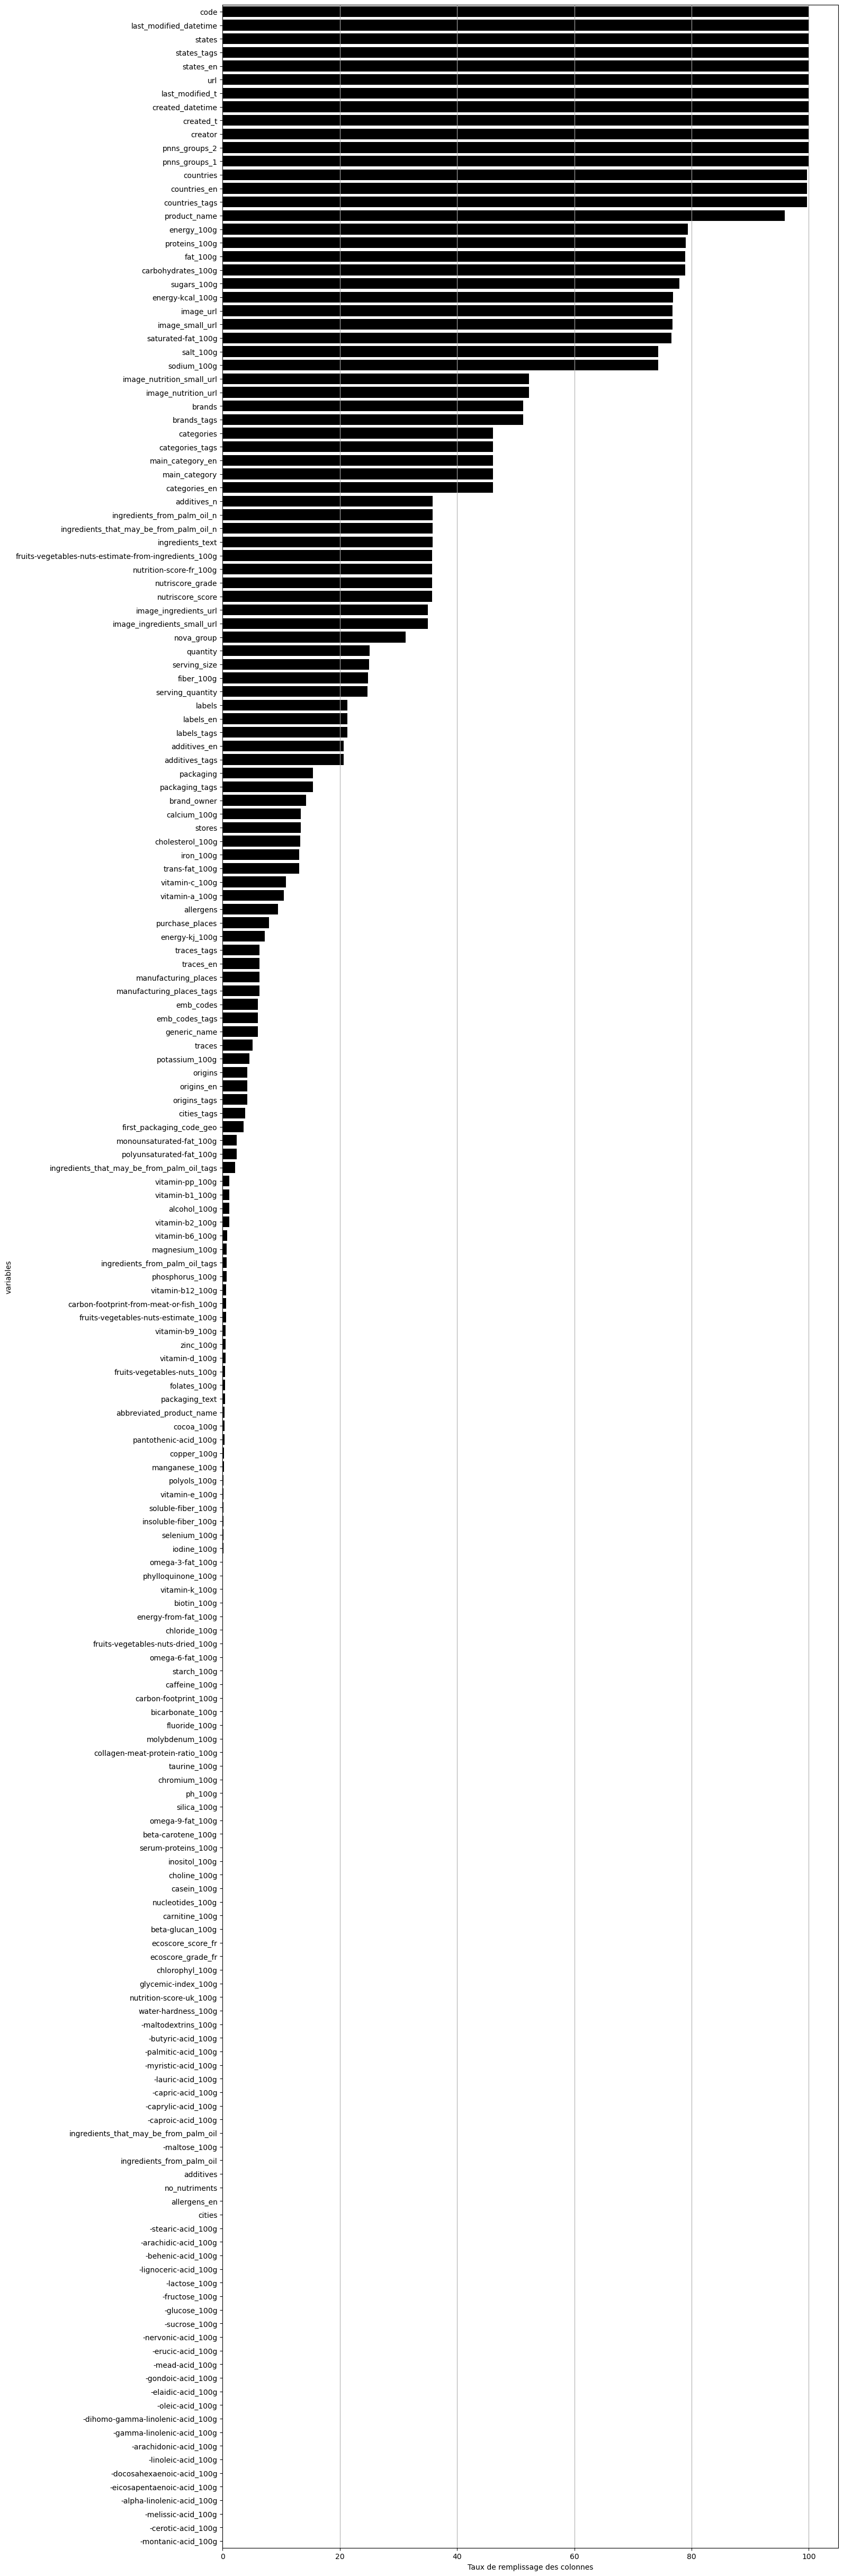

In [7]:
Pourcentage_no_NaN = Taux_non_nuls(DF, PRINT = 'print')

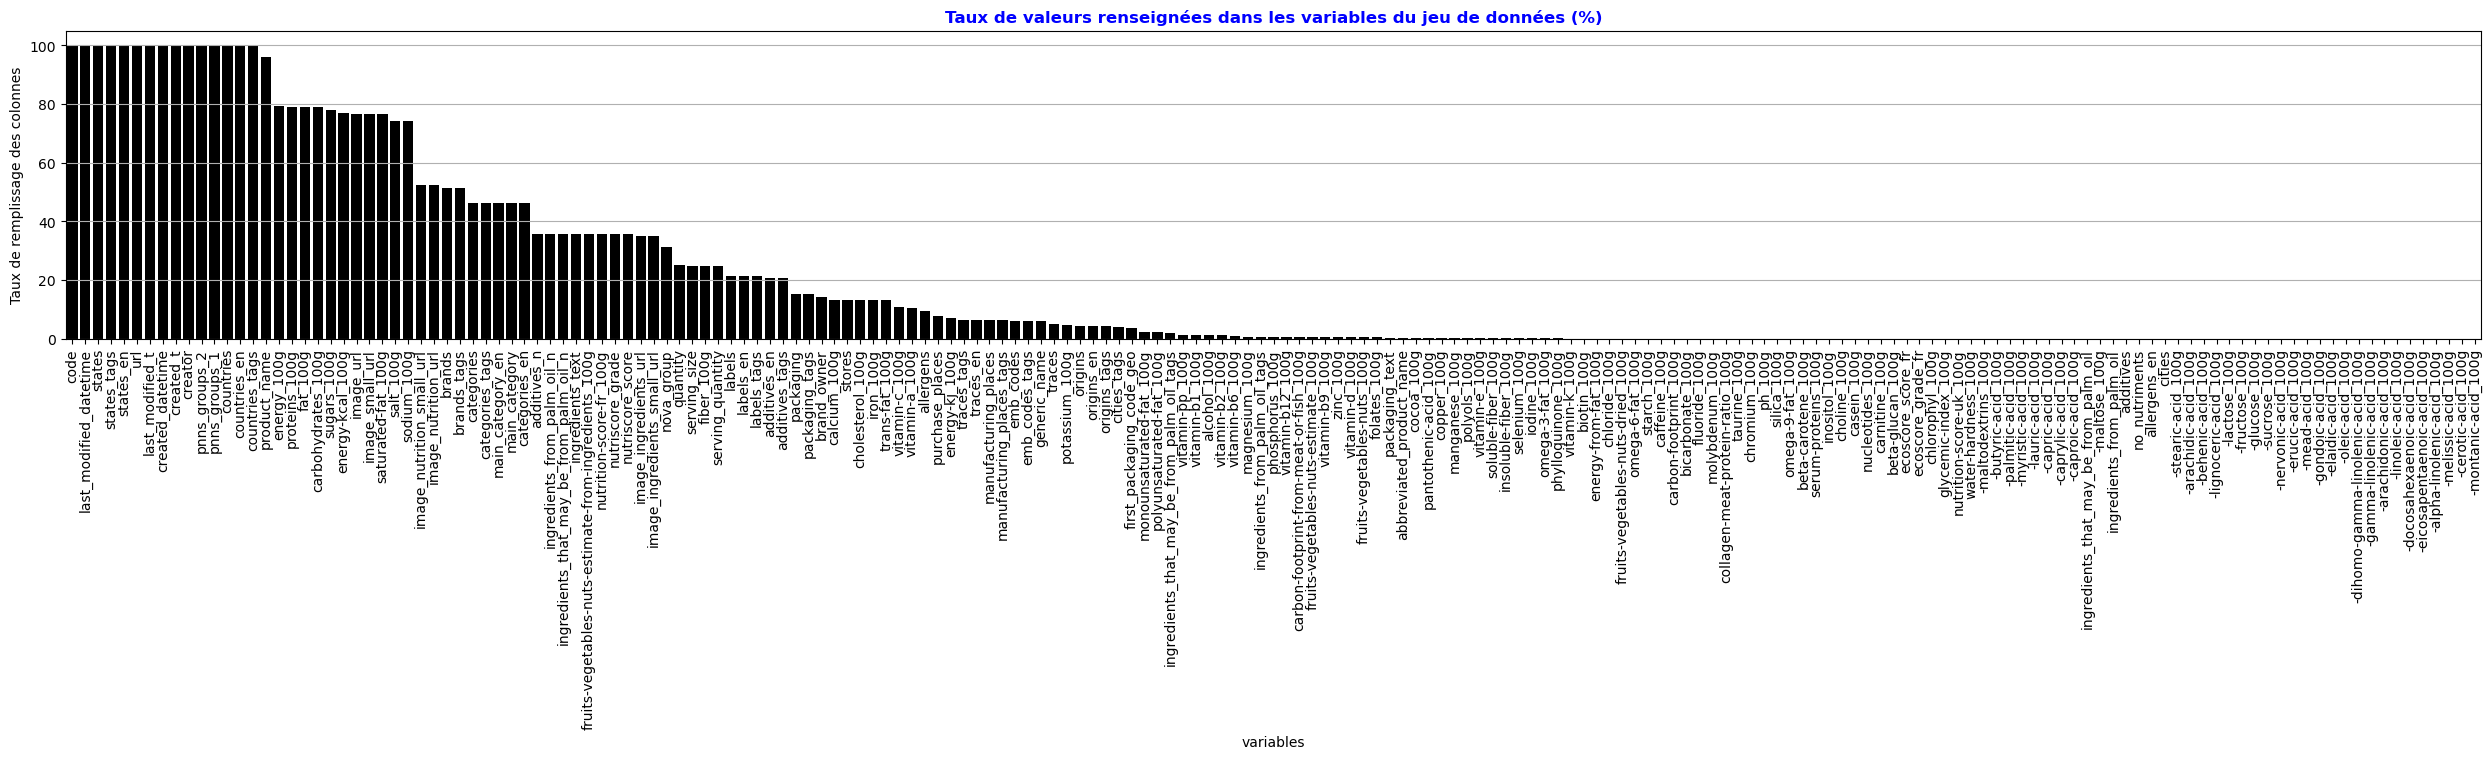

In [8]:
print_Taux_non_nuls(Pourcentage_no_NaN, invert_xy='yes')

## Etape 3 : Nettoyage du jeu de donnée
### 3.1 Suppression des doublons
<p align="justify"><b>&emsp;&emsp;Il s'agit de vérifier si nous avons des doublons dans le jeu de donnée et de les éliminer si c'est le cas.

In [9]:
doublons = DF[DF.duplicated(subset='code')]
DF_clean = DF.drop_duplicates(subset='code',keep = 'last')
print('le dataset comporte {} doublons dans la colonne code'.format(doublons.shape[0]) )
print('le dataset sans doublons comporte {} lignes et {} variables'.format(DF.shape[0],DF.shape[1]))
print('le dataset nettoyé comporte {} lignes et {} variables'.format(DF_clean.shape[0],DF_clean.shape[1]))

le dataset comporte 15 doublons dans la colonne code
le dataset sans doublons comporte 2031090 lignes et 187 variables
le dataset nettoyé comporte 2031075 lignes et 187 variables


In [10]:
# Affichage des variables accompagnées de quelques statistiques. 
def affichage_colonne(DF, tags):
    pd.set_option('display.max_colwidth', 50)
    Cols = DF.columns.str.lower()
    Cols = Cols[Cols.str.contains(str(tags)) == True]
    DF = DF[Cols]
    
    DF1 = DF.dropna(axis = 0)
    print(DF1.sample(5))

    print('\n')
    print(f'Nombre totales de lignes : {DF.shape[0]}\nNombre de valeurs présents dans chaque colonnes : \n{DF.notnull().sum()}\n' )
    pd.reset_option('display.max_colwidth')

### 3.2 Filtrer le jeu de donnée par rapport à la qualité des variables et du pays 
<p align="justify"><b>&emsp;&emsp;Il s'agit de filtrer le jeu de donnée par rapport aux produits vendus en france puis de    sélectionner les variables avec un taux de valeurs renseignées supérieures au seuil choisi

In [11]:
affichage_colonne(DF_clean,'countrie')

         countries countries_tags countries_en
1298220      en:it       en:italy        Italy
819287      France      en:france       France
1930883  Singapore   en:singapore    Singapore
1069668      en:fr      en:france       France
638770       en:es       en:spain        Spain


Nombre totales de lignes : 2031075
Nombre de valeurs présents dans chaque colonnes : 
countries         2024914
countries_tags    2024909
countries_en      2024909
dtype: int64



In [12]:
def Filtre_pays(DF,countrie="countrie"):
    Nb_rows,Nb_cols = DF.shape
    DF_cols = DF.columns.str.lower()
    DF_cols = DF_cols[DF_cols.str.contains(countrie)]
    Select_index=pd.Index([])
    for col in DF_cols:
        filtre_pays = DF[col].str.lower()
        filtre_pays = filtre_pays[(filtre_pays.str.contains('fr')==True) & (filtre_pays.str.contains('afri')==False)]
        index_pays = filtre_pays.index
        Select_index = Select_index.join(index_pays,how='outer')
    
    DF_filtrer = DF.loc[Select_index]    
    
# cases aberrantes (3 colonnes : 2 ou 3 pays différents)
    for col in DF_cols:
        valeurs_aberrantes = DF_filtrer[col].str.lower()
        valeurs_aberrantes = valeurs_aberrantes[(valeurs_aberrantes.str.contains('fr')==False)].index
        DF_filtrer = DF_filtrer.drop(index = valeurs_aberrantes)
    
    Nb_rows_filtrer,Nb_cols_filtrer = DF_filtrer.shape
    print(f'{round(100-100*Nb_rows_filtrer/Nb_rows,2)}% des lignes ont été éliminées')
    print(f'il reste : {Nb_rows_filtrer} lignes dans le dataset')
    print(f'{Nb_rows-Nb_rows_filtrer} lignes ont été supprimées')
    
# Suppressions des colonnes redondantes
    if len(DF_cols)>0:
        DF_filtrer = DF_filtrer.drop(DF_cols[1:len(DF_cols)],axis=1)
    DF_filtrer.reset_index(drop=True,inplace=True)
    return DF_filtrer

In [13]:
DF_clean_pays = Filtre_pays(DF_clean)

57.99% des lignes ont été éliminées
il reste : 853272 lignes dans le dataset
1177803 lignes ont été supprimées


29.73% des colonnes, soit 55 ont un taux de remplissage >= 15%


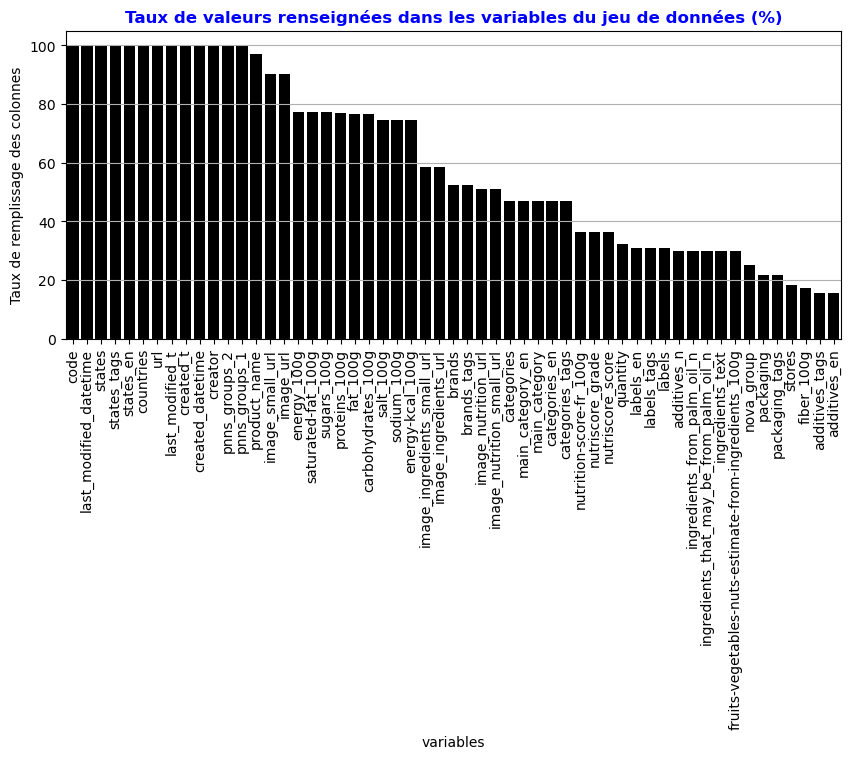

In [14]:
print_Taux_non_nuls(Taux_non_nuls(DF_clean_pays,seuil = 15),invert_xy='yes')

In [15]:
DF_clean_pays_seuil = DF_Select_cols_seuil(DF_clean_pays,seuil = 15,PRINT = 'noprint')

29.73% des colonnes, soit 55 ont un taux de remplissage >= 15%


### 3.3 Filtrer le jeu de donnée lorsqu' aucune donnée physico chimique n'est indiquée 
<p align="justify"><b>&emsp;&emsp;Il s'agit d'éliminer les lignes où aucune valeur physico-chimiques n'est indiquée

In [16]:
def Filtre_cols_100g(DF, suffix='_100g'):
    Nb_rows,Nb_cols = DF.shape
    DF_cols = DF.columns.str.lower()
    DF_cols = DF_cols[DF_cols.str.contains(suffix)]

# filtre les lignes si aucune valeur n'est renseignée 
#     DF_filtrer = DF[DF[DF_cols].notnull().any(axis = 1)]

# filtre les lignes si toute la ligne est égale à 0 ou NaN  
    DF_filtrer = DF[~ ( (DF[DF_cols].isnull()) | (DF[DF_cols]==0) ).all(axis = 1) ]
    
    print(f'{round(100-100*DF_filtrer.shape[0]/Nb_rows,2)}% des lignes ont été éliminées')
    print(f'il reste : {DF_filtrer.shape[0]} lignes dans le dataset')
    print(f'{Nb_rows-DF_filtrer.shape[0]} lignes ont été supprimées')
    DF_filtrer.reset_index(drop=True,inplace=True)
    return DF_filtrer

In [17]:
DF_clean_pays_seuil_100g = Filtre_cols_100g(DF_clean_pays_seuil)

23.13% des lignes ont été éliminées
il reste : 655914 lignes dans le dataset
197358 lignes ont été supprimées


In [18]:
DF_clean_pays_seuil_100g[['energy_100g', 'saturated-fat_100g', 'sugars_100g', 'proteins_100g',
       'fat_100g', 'carbohydrates_100g', 'salt_100g', 'sodium_100g',
       'energy-kcal_100g', 'nutrition-score-fr_100g',
       'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'fiber_100g']].notnull().sum()

energy_100g                                              649683
saturated-fat_100g                                       646657
sugars_100g                                              647914
proteins_100g                                            649259
fat_100g                                                 647440
carbohydrates_100g                                       647416
salt_100g                                                621945
sodium_100g                                              621945
energy-kcal_100g                                         623978
nutrition-score-fr_100g                                  307444
fruits-vegetables-nuts-estimate-from-ingredients_100g    235540
fiber_100g                                               146906
dtype: int64

In [19]:
DF_clean_pays_seuil_100g[['energy_100g', 'saturated-fat_100g', 'sugars_100g', 'proteins_100g',
       'fat_100g', 'carbohydrates_100g', 'salt_100g', 'sodium_100g',
       'energy-kcal_100g', 'nutrition-score-fr_100g',
       'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'fiber_100g']].head(5)

,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,fat_100g,carbohydrates_100g,salt_100g,sodium_100g,energy-kcal_100g,nutrition-score-fr_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,fiber_100g
0,1569.0,3.08,15.0,7.8,7.0,70.1,1.40,0.560,375.0,NaN,NaN,NaN
1,936.0,2.20,22.0,5.1,8.2,29.0,4.60,1.840,NaN,18.0,0.0,0.0
2,88.0,0.00,0.4,0.2,0.0,4.8,2.04,0.816,21.0,NaN,NaN,NaN
3,251.0,1.00,3.0,2.0,3.0,10.0,1.15,0.460,60.0,NaN,NaN,NaN
4,264.0,0.00,15.5,0.2,0.0,15.5,0.00,0.000,63.0,NaN,NaN,NaN


### 3.4 Sélection des variables pertinentes
<p align="justify"><b>&emsp;&emsp;Il s'agit de ne séléctionner que les variables pertinentes 

<font color = 'blue'><b> Variables liées aux date-times

In [20]:
def convert_data_time(DF):
    DF.loc[:,'created_datetime'] =  pd.to_datetime(DF.loc[:,'created_t'],unit='s')
    DF.loc[:,'last_modified_datetime'] = pd.to_datetime(DF.loc[:,'last_modified_t'],unit='s')
    DF = DF.drop(['created_t','last_modified_t'],axis=1)
    return DF

In [21]:
DF_select_var = convert_data_time(DF_clean_pays_seuil_100g)

<font color = 'blue'><b> Variables redondantes

In [22]:
# Listes des variables redondantes contenants les tags en et tags 
def Liste_cols_redondantes(DF, tags = ['_en','_tags']):
    DF_Cols=DF.columns.str.lower()
    Liste_cols = pd.Index([])
    for tag in tags:
        Cols = DF_Cols[DF_Cols.str.contains(tag) == True]
        Cols = Cols.str.replace(tag,'')  
        Liste_cols = Liste_cols.append(Cols)
    cols_unique = Liste_cols.unique().values
    return cols_unique

# Compare les colonnes deux à deux en terme de valeurs indiquées 
def compare_2cols(DF,col1,col2):
    nb_rows, nb_cols = DF.shape
    
    col1_notnull_col2_null = DF[(DF[col1].notnull()) & (DF[col2].isnull())][[col1,col2]]
    col2_notnull_col1_null = DF[(DF[col2].notnull()) & (DF[col1].isnull())][[col1,col2]]
    col1_notnull_col2_notnull = DF[(DF[col1].notnull()) & (DF[col2].notnull())][[col1,col2]]
    col1_null_col2_null = DF[(DF[col1].isnull()) & (DF[col2].isnull())][[col1,col2]]
    
    Nb_col1_notnull = DF[col1].notnull().sum()
    Nb_col2_notnull = DF[col2].notnull().sum()
    
    print(f'nombre de ligne où {col1} et {col2} sont renseignés respectivement : {Nb_col1_notnull} et {Nb_col2_notnull}')
    print(f'nombre de ligne où {col1} est renseigné mais pas {col2} : {col1_notnull_col2_null.shape[0]}')
    print(f'nombre de ligne où {col2} est renseigné mais pas {col1} : {col2_notnull_col1_null.shape[0]}\n')
    
# Suppression de la colonne indiquée    
def Supp_cols(DF, tags):        
    Liste_cols = pd.Index([])
    if len(tags[0]) == 1:
        tags = tags.split()
        
    for tag in tags:
        DF_Cols=DF.columns.str.lower()
        Cols = DF_Cols[DF_Cols.str.contains(str(tag)) == True]
        DF = DF.drop(Cols,axis=1)
        Liste_cols = Liste_cols.append(Cols)      
    print(f'{Liste_cols.shape[0]} colonnes ont été supprimées, il reste {DF.shape[1]} colonnes\n')
    print(f'listes des colonnes supprimées :  \n\n{Liste_cols.values}')
    return DF

# Sélection d'une des colonnes redondantes indiquées en fonction du nombre de valeurs indiquées 
def Supp_cols_redondantes(DF, tags):
    Liste_cols = pd.Index([])
    if len(tags[0]) == 1:
        tags = tags.split()        
    for tag in tags:
        DF_Cols=DF.columns.str.lower()
        Cols = DF_Cols[DF_Cols.str.contains(str(tag)) == True]
        if Cols.shape[0] > 1 :
            Cols_max = DF[Cols].notnull().sum().idxmax(axis = 0)
            Cols = Cols.drop(Cols_max)
        else:
            Cols_max = Cols
        DF = DF.drop(Cols,axis=1)
        Liste_cols = Liste_cols.append(Cols)

        if '_en' in Cols_max :
            DF.rename(columns={Cols_max:Cols_max.replace('_en','')}, inplace=True)
        elif '_tags' in Cols_max :
            DF.rename(columns={Cols_max:Cols_max.replace('_tags','')}, inplace=True)     
    print(f'{Liste_cols.shape[0]} colonnes ont été supprimées, il reste {DF.shape[1]} colonnes\n')
    print(f'listes des colonnes supprimées :  \n\n{Liste_cols.values}')
    return DF

In [23]:
DF_select_var1 = Supp_cols(DF_select_var,'image')

6 colonnes ont été supprimées, il reste 47 colonnes

listes des colonnes supprimées :  

['image_small_url' 'image_url' 'image_ingredients_small_url'
 'image_ingredients_url' 'image_nutrition_url' 'image_nutrition_small_url']


In [24]:
Liste_redondante = Liste_cols_redondantes(DF_select_var1, ['_en','_tags'])
Liste_redondante

array(['states', 'main_category', 'categories', 'labels', 'additives',
       'brands', 'packaging'], dtype=object)

In [25]:
affichage_colonne(DF_select_var1,'states')

                                                   states  \
521345  en:to-be-completed, en:nutrition-facts-complet...   
243873  en:to-be-completed, en:nutrition-facts-complet...   
554634  en:to-be-completed, en:nutrition-facts-complet...   
356698  en:to-be-checked, en:complete, en:nutrition-fa...   
393082  en:to-be-completed, en:nutrition-facts-complet...   

                                              states_tags  \
521345  en:to-be-completed,en:nutrition-facts-complete...   
243873  en:to-be-completed,en:nutrition-facts-complete...   
554634  en:to-be-completed,en:nutrition-facts-complete...   
356698  en:to-be-checked,en:complete,en:nutrition-fact...   
393082  en:to-be-completed,en:nutrition-facts-complete...   

                                                states_en  
521345  To be completed,Nutrition facts completed,Ingr...  
243873  To be completed,Nutrition facts completed,Ingr...  
554634  To be completed,Nutrition facts completed,Ingr...  
356698  To be checked,Comp

In [26]:
affichage_colonne(DF_select_var1,'brand')
compare_2cols(DF_select_var1, 'brands','brands_tags' )

                               brands                    brands_tags
125074  Atelier Des Fruits Et Legumes  atelier-des-fruits-et-legumes
425923             Force Ultra Nature             force-ultra-nature
137714                        Panzani                        panzani
243013                     Vitarmonyl                     vitarmonyl
383655                     Belledonne                     belledonne


Nombre totales de lignes : 655914
Nombre de valeurs présents dans chaque colonnes : 
brands         378357
brands_tags    378331
dtype: int64

nombre de ligne où brands et brands_tags sont renseignés respectivement : 378357 et 378331
nombre de ligne où brands est renseigné mais pas brands_tags : 36
nombre de ligne où brands_tags est renseigné mais pas brands : 10



In [27]:
affichage_colonne(DF_select_var1,'label')
compare_2cols(DF_select_var1, 'labels_en','labels' )
compare_2cols(DF_select_var1, 'labels_en','labels_tags' )

                                           labels_en  \
477156                  Organic,EU Organic,HU-ÖKO-01   
422853                                       Organic   
239569  Organic,EU Organic,AB Agriculture Biologique   
241565                                Made in France   
213480   Sustainable-fishery,Sustainable Seafood MSC   

                                              labels_tags  \
477156              en:organic,en:eu-organic,en:hu-oko-01   
422853                                         en:organic   
239569  en:organic,en:eu-organic,fr:ab-agriculture-bio...   
241565                                  en:made-in-france   
213480  en:sustainable-fishery,en:sustainable-seafood-msc   

                                               labels  
477156                  Bio, Bio européen, HU-ÖKO-01   
422853                                           Bio   
239569  Bio, Bio européen, AB Agriculture Biologique   
241565                      Hergestellt in Frankreich  
213480          

In [28]:
affichage_colonne(DF_select_var1,'packaging')
compare_2cols(DF_select_var1, 'packaging','packaging_tags' )

                                                packaging  \
132846  Pot plastique,Opercule plastique,Emballage car...   
402811                                Barquette,plastique   
294960                                     Carton,Surgelé   
633233                            boite plastique,surgelé   
551089       Boite Plastique, boite, fr:Film en plastique   

                                           packaging_tags  
132846  pot-plastique,opercule-plastique,emballage-car...  
402811                                barquette,plastique  
294960                                     carton,surgele  
633233                            boite-plastique,surgele  
551089         boite-plastique,boite,fr-film-en-plastique  


Nombre totales de lignes : 655914
Nombre de valeurs présents dans chaque colonnes : 
packaging         156809
packaging_tags    156805
dtype: int64

nombre de ligne où packaging et packaging_tags sont renseignés respectivement : 156809 et 156805
nombre de ligne où packag

In [29]:
affichage_colonne(DF_select_var1,'categ')

                                               categories  \
73807   Aliments et boissons à base de végétaux, Alime...   
147532  Édulcorants, Sirops, Sirops simples, Sirops d'...   
188793     Viandes, Charcuteries, Jambons, Jambons blancs   
549858  Getränke, Milchprodukte, Milchgetränke, Aromat...   
449273  Snacks, Snacks sucrés, Biscuits et gâteaux, Gâ...   

                         main_category_en  \
73807                           Plum jams   
147532                       Agave syrups   
188793                         White hams   
549858  Partially skimmed chocolate milks   
449273                         Pound Cake   

                               main_category  \
73807                           en:plum-jams   
147532                       en:agave-syrups   
188793                         en:white-hams   
549858  en:partially-skimmed-chocolate-milks   
449273                         en:pound-cake   

                                            categories_en  \
73807   Plan

In [30]:
affichage_colonne(DF_select_var1,'addit')
compare_2cols(DF_select_var1,'additives_tags','additives_en')
compare_2cols(DF_select_var1,'additives_tags','additives_n')

        additives_n                   additives_tags  \
60976           1.0                          en:e322   
451158          4.0  en:e330,en:e428,en:e901,en:e903   
244605          1.0                          en:e300   
204495          1.0                          en:e330   
244878          4.0  en:e120,en:e262,en:e300,en:e316   

                                             additives_en  
60976                                    E322 - Lecithins  
451158  E330 - Citric acid,E428 - Gelatine,E901 - Whit...  
244605                               E300 - Ascorbic acid  
204495                                 E330 - Citric acid  
244878  E120 - Cochineal,E262 - Sodium acetates,E300 -...  


Nombre totales de lignes : 655914
Nombre de valeurs présents dans chaque colonnes : 
additives_n       235786
additives_tags    129814
additives_en      129814
dtype: int64

nombre de ligne où additives_tags et additives_en sont renseignés respectivement : 129814 et 129814
nombre de ligne où additive

In [31]:
DF_select_var2 = Supp_cols_redondantes(DF_select_var1, Liste_redondante)

11 colonnes ont été supprimées, il reste 36 colonnes

listes des colonnes supprimées :  

['states_tags' 'states_en' 'main_category' 'categories_en'
 'categories_tags' 'labels_tags' 'labels' 'additives_tags' 'additives_en'
 'brands_tags' 'packaging_tags']


In [32]:
affichage_colonne(DF_select_var2, 'pnns')
compare_2cols(DF_select_var2,'pnns_groups_1','pnns_groups_2')
print(pd.DataFrame(DF_select_var2['pnns_groups_1'].value_counts()))
print(pd.DataFrame(DF_select_var2['pnns_groups_2'].value_counts()))

              pnns_groups_2         pnns_groups_1
526848              Legumes  Cereals and potatoes
524831       Processed meat        Fish Meat Eggs
67609               unknown               unknown
490569  Sweetened beverages             Beverages
159118              unknown               unknown


Nombre totales de lignes : 655914
Nombre de valeurs présents dans chaque colonnes : 
pnns_groups_2    655914
pnns_groups_1    655914
dtype: int64

nombre de ligne où pnns_groups_1 et pnns_groups_2 sont renseignés respectivement : 655914 et 655914
nombre de ligne où pnns_groups_1 est renseigné mais pas pnns_groups_2 : 0
nombre de ligne où pnns_groups_2 est renseigné mais pas pnns_groups_1 : 0

                         pnns_groups_1
unknown                         353584
Sugary snacks                    62996
Fish Meat Eggs                   51020
Milk and dairy products          37810
Cereals and potatoes             29934
Composite foods                  27878
Beverages                    

In [33]:
affichage_colonne(DF_select_var2, 'nutri')
compare_2cols(DF_select_var2,'nutrition-score-fr_100g','nutriscore_score')
compare_2cols(DF_select_var2,'nutriscore_grade','nutriscore_score')

        nutrition-score-fr_100g nutriscore_grade  nutriscore_score
518182                      1.0                b               1.0
205402                      8.0                c               8.0
56920                      26.0                e              26.0
50124                      13.0                d              13.0
388062                     21.0                e              21.0


Nombre totales de lignes : 655914
Nombre de valeurs présents dans chaque colonnes : 
nutrition-score-fr_100g    307444
nutriscore_grade           307441
nutriscore_score           307441
dtype: int64

nombre de ligne où nutrition-score-fr_100g et nutriscore_score sont renseignés respectivement : 307444 et 307441
nombre de ligne où nutrition-score-fr_100g est renseigné mais pas nutriscore_score : 3
nombre de ligne où nutriscore_score est renseigné mais pas nutrition-score-fr_100g : 0

nombre de ligne où nutriscore_grade et nutriscore_score sont renseignés respectivement : 307441 et 307441
n

In [34]:
affichage_colonne(DF_select_var2, 'palm')
compare_2cols(DF_select_var2,'ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n')

        ingredients_from_palm_oil_n  ingredients_that_may_be_from_palm_oil_n
245222                          0.0                                      0.0
427194                          0.0                                      0.0
570485                          0.0                                      0.0
341276                          0.0                                      0.0
196068                          0.0                                      0.0


Nombre totales de lignes : 655914
Nombre de valeurs présents dans chaque colonnes : 
ingredients_from_palm_oil_n                235786
ingredients_that_may_be_from_palm_oil_n    235786
dtype: int64

nombre de ligne où ingredients_from_palm_oil_n et ingredients_that_may_be_from_palm_oil_n sont renseignés respectivement : 235786 et 235786
nombre de ligne où ingredients_from_palm_oil_n est renseigné mais pas ingredients_that_may_be_from_palm_oil_n : 0
nombre de ligne où ingredients_that_may_be_from_palm_oil_n est renseigné mais pas i

In [35]:
DF_select_var_final = Supp_cols_redondantes(DF_select_var2, ['stores','sodium','nutriscore_s','palm'])

4 colonnes ont été supprimées, il reste 32 colonnes

listes des colonnes supprimées :  

['stores' 'sodium_100g' 'nutriscore_score'
 'ingredients_that_may_be_from_palm_oil_n']


In [36]:
DF_select_var_final.sample(5)

,code,last_modified_datetime,states,countries,url,created_datetime,creator,pnns_groups_2,pnns_groups_1,product_name,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,fat_100g,carbohydrates_100g,salt_100g,energy-kcal_100g,brands,categories,main_category,nutrition-score-fr_100g,nutriscore_grade,quantity,labels,additives_n,ingredients_from_palm_oil_n,ingredients_text,fruits-vegetables-nuts-estimate-from-ingredients_100g,nova_group,packaging,fiber_100g
365977,3609761201298,2021-03-24 11:12:51,"en:to-be-completed, en:nutrition-facts-complet...",France,http://world-en.openfoodfacts.org/product/3609...,2020-12-20 17:22:07,chris92000b,Nuts,Salty snacks,La noix de cajou,2509.0,9.1,8.6,18.0,45.0,29.0,30.00,604.0,BIOnly,"Aliments et boissons à base de végétaux, Alime...",Cashew nuts,14.0,d,125 g,"Organic,EU Organic,Non-EU Agriculture,FR-BIO-1...",0.0,0.0,NOIX DE CAJOU,100.0,1.0,"sachet,papier",3.3
63974,20006686,2019-03-25 18:53:54,"en:to-be-completed, en:nutrition-facts-complet...",France,http://world-en.openfoodfacts.org/product/2000...,2018-06-13 07:31:09,kiliweb,unknown,unknown,"Farandole De Fruits, Yaourt Sucré Avec Des Fruits",385.0,1.7,12.7,3.3,2.7,13.7,0.10,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316772,3498751003369,2021-03-02 13:24:41,"en:to-be-completed, en:nutrition-facts-complet...",en:fr,http://world-en.openfoodfacts.org/product/3498...,2021-03-02 13:24:40,kiliweb,unknown,unknown,Caramel au beurre D'isigny,1753.0,7.2,59.3,2.5,10.9,77.7,0.42,419.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
390179,3701138104277,2019-02-25 14:13:35,"en:to-be-completed, en:nutrition-facts-complet...",en:france,http://world-en.openfoodfacts.org/product/3701...,2019-02-20 12:36:30,kiliweb,One-dish meals,Composite foods,"Duo de carottes râpées, vinaigre de framboise ...",515.0,1.0,0.8,2.7,8.5,7.6,0.30,123.0,NaN,"Plats préparés, Légumes préparés, Carottes râp...",Seasoned shredded carrots,1.0,b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
606607,8412054004279,2021-03-06 17:08:01,"en:to-be-completed, en:nutrition-facts-complet...",en:fr,http://world-en.openfoodfacts.org/product/8412...,2021-03-06 17:08:00,kiliweb,unknown,unknown,Caprice de chocolat,2130.0,17.0,44.0,4.8,27.0,59.0,NaN,509.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3.5 Suppression des valeurs aberrantes 
<p align="justify"><b>&emsp;&emsp;Il s'agit de supprimer les valeurs aberrantes dans le jeu de donnée

In [37]:
DF_select_var_final.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655914 entries, 0 to 655913
Data columns (total 32 columns):
 #   Column                                                 Non-Null Count   Dtype         
---  ------                                                 --------------   -----         
 0   code                                                   655914 non-null  object        
 1   last_modified_datetime                                 655914 non-null  datetime64[ns]
 2   states                                                 655914 non-null  object        
 3   countries                                              655914 non-null  object        
 4   url                                                    655914 non-null  object        
 5   created_datetime                                       655914 non-null  datetime64[ns]
 6   creator                                                655913 non-null  object        
 7   pnns_groups_2                                          6

In [38]:
DF_select_var_final.describe()

,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,fat_100g,carbohydrates_100g,salt_100g,energy-kcal_100g,nutrition-score-fr_100g,additives_n,ingredients_from_palm_oil_n,fruits-vegetables-nuts-estimate-from-ingredients_100g,nova_group,fiber_100g
count,6.496830e+05,646657.000000,647914.000000,649259.000000,647440.000000,647416.000000,621945.000000,6.239780e+05,307444.000000,235786.000000,235786.000000,235540.000000,201410.000000,146906.000000
mean,1.189261e+03,5.489743,13.897691,9.078469,14.371224,27.696069,1.312346,2.846228e+02,9.493433,1.680524,0.050779,13.092665,3.440177,3.064161
std,1.007629e+04,8.463853,39.381188,91.138743,40.104412,240.397488,18.632429,1.738030e+03,8.761808,2.397575,0.222826,57.158302,0.948064,5.180003
min,0.000000e+00,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000e+00,-15.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4.850000e+02,0.200000,0.700000,1.600000,1.100000,2.800000,0.081000,1.170000e+02,2.000000,0.000000,0.000000,0.000000,3.000000,0.200000
50%,1.117000e+03,2.100000,3.600000,6.300000,8.100000,14.000000,0.575000,2.700000e+02,10.000000,1.000000,0.000000,0.000000,4.000000,1.700000
75%,1.682000e+03,8.080000,20.000000,13.000000,22.500000,52.099998,1.333333,4.030000e+02,16.000000,2.000000,0.000000,10.000000,4.000000,3.700000
max,8.010000e+06,2000.000000,27000.000000,73000.000000,29000.000000,192000.000000,14000.000000,1.360000e+06,40.000000,30.000000,3.000000,13454.000000,4.000000,200.000000


In [39]:
def filtre_NaN(DF, cols) : 
    Nb_rows,Nb_cols = DF.shape
    DF = DF.dropna(axis=0, subset = [cols])    
    DF = DF.reset_index(drop=True)
    
    print(f'{round(100-100*DF.shape[0]/Nb_rows,2)}% des lignes ont été éliminées')
    print(f'il reste : {DF.shape[0]} lignes dans le dataset')
    print(f'{Nb_rows-DF.shape[0]} lignes ont été supprimées')
    return DF

# Suppression des lignes où les données physico-chimiques sont négatifs ou supérireurs à 100
def valeurs_aberrantes(DF):
    var_numérique = DF.select_dtypes(include = ['int64','float64']).columns
    var_numérique = var_numérique[var_numérique.str.contains('_100g') == True]
    var_numérique = var_numérique.drop(['energy-kcal_100g','nutrition-score-fr_100g','energy_100g'])
                                       
# Densité énergétique maximale graisse : 3700 kJ/100g soit 900 kcal/100g --> energie < 370kJ/100g    
    DF_Cols = DF[ (DF[var_numérique]<0).any(axis=1) | (DF[var_numérique]>=100).any(axis=1) | 
                        (DF['energy-kcal_100g']>900) | (DF['energy_100g']>3700)]                                 
    DF = DF.drop(index = DF_Cols.index)
    print(f'{DF_Cols.shape[0]} lignes ont été supprimées')
    print(f'il reste {DF.shape[0]}')
    DF.reset_index(drop=True,inplace=True)
    
    return DF

<font color = 'blue'><b> Suppression des lignes où le nom du produit est manquant

In [40]:
DF_supp_var = filtre_NaN(DF_select_var_final,'product_name')

0.39% des lignes ont été éliminées
il reste : 653361 lignes dans le dataset
2553 lignes ont été supprimées


<font color = 'blue'><b> Suppression des lignes où les données physico-chimiques sont négatifs ou supérieurs à 100

In [41]:
DF_final = valeurs_aberrantes(DF_select_var_final)
DF_final.describe()

16826 lignes ont été supprimées
il reste 639088


,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,fat_100g,carbohydrates_100g,salt_100g,energy-kcal_100g,nutrition-score-fr_100g,additives_n,ingredients_from_palm_oil_n,fruits-vegetables-nuts-estimate-from-ingredients_100g,nova_group,fiber_100g
count,634404.000000,631562.000000,632770.000000,634050.000000,632235.000000,632187.000000,607574.000000,609557.000000,297294.000000,225101.000000,225101.000000,224858.000000,192259.000000,140954.000000
mean,1144.015074,5.395239,13.854388,9.072455,13.723165,27.585803,1.256873,274.431094,9.638348,1.743475,0.052918,9.136496,3.526639,3.055631
std,748.361535,7.580804,19.890630,9.914589,15.879632,27.639634,3.897836,179.255930,8.751179,2.416926,0.227220,20.005899,0.851748,5.101423
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,490.000000,0.300000,0.700000,1.870000,1.200000,3.000000,0.100000,118.000000,2.000000,0.000000,0.000000,0.000000,3.000000,0.230000
50%,1109.000000,2.100000,3.600000,6.400000,8.100000,15.000000,0.600000,267.000000,11.000000,1.000000,0.000000,0.000000,4.000000,1.700000
75%,1669.000000,8.000000,20.000000,13.000000,22.000000,52.600000,1.400000,400.000000,16.000000,3.000000,0.000000,7.000000,4.000000,3.700000
max,3700.000000,99.900000,99.990000,99.700000,99.970000,99.990000,99.990000,900.000000,40.000000,30.000000,3.000000,99.990000,4.000000,99.000000


In [42]:
DF_final.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639088 entries, 0 to 639087
Data columns (total 32 columns):
 #   Column                                                 Non-Null Count   Dtype         
---  ------                                                 --------------   -----         
 0   code                                                   639088 non-null  object        
 1   last_modified_datetime                                 639088 non-null  datetime64[ns]
 2   states                                                 639088 non-null  object        
 3   countries                                              639088 non-null  object        
 4   url                                                    639088 non-null  object        
 5   created_datetime                                       639088 non-null  datetime64[ns]
 6   creator                                                639087 non-null  object        
 7   pnns_groups_2                                          6

## Etape 4 : Ajout des variables de "scoring"

### 4.1 "Scoring" du nutri-score.

In [43]:
scoring= [1,2,3,4,5]

def info_cols(DF, label):
    lignes_non_na = DF[label].notnull().sum()
    lignes_na = DF[label].isnull().sum()
    print(f'nombre de lignes : {DF[label].shape[0]}')
    print(f'nombre de valeurs renseignées : {lignes_non_na } ')
    print(f'nombre de valeurs manquantes : {lignes_na} ') 

def convert_cat_to_nb(col):
    convert = {
        'a' : 1,
        'b' : 2,
        'c' : 3,
        'd' : 4,
        'e' : 5,
        'nan' : None,
    }
    return convert.get(col)

In [44]:
DF_final['nutriscore_scoring'] = DF_final['nutriscore_grade'].apply(convert_cat_to_nb)
info_cols(DF_final, 'nutriscore_scoring' )

nombre de lignes : 639088
nombre de valeurs renseignées : 297291 
nombre de valeurs manquantes : 341797 


### 4.2 Comptage du nombre d'aliments + "scoring"

In [45]:
def scoring_bins(DF , tags , scoring , bins, labels = [1,2,3,4,5], include = False):
    Cols = DF.columns
    Cols = Cols[Cols.str.contains(str(tags)) == True]
    DF[scoring]= pd.cut(DF[Cols[0]],right=include, bins = bins,labels=labels)
    return DF

In [46]:
pd.set_option('display.max_colwidth', 1000)
DF_final[DF_final['ingredients_text'].notnull()==True]['ingredients_text'].sample(5)

518360                                                                                                                                                                 Sucre, Huiles végétales (de colza, de palme, de tournesol), Lait entier en poudre (7%), Poudre de lait écrémé (7%), Lactosérum en poudre (de lait), Cacao maigre (5,5%), Chocolat noir dessert (1,5%) (Pâte de cacao, Sucre, Beurre de cacao, Matière grasse lactique, Émulsifiant:lécithine de soja), Purée de noisettes, Émulsifiant (lécithine de tournesol), Arôme. Peut contenir des amandes.
174816                                                                                                             Manchons de poulet traités en salaison 70% : manchon de poulet 64% (origine : ue), eau, sirop de glucose, protéines de soja, sel, arômes naturels, dextrose, extrait de levure, extrait d'épices, huile essentielle d'ail, colorant : extrait de paprika.panure 30% : chapelure (farine de ble, levure, sel), farines de ble et de maïs, gl

In [47]:
DF_final['nb_ingredients_100g'] = DF_final[DF_final['ingredients_text'].notnull()]['ingredients_text'].str.strip().str.split(',').apply(len)
DF_final = scoring_bins(DF_final, tags='nb_ingredients_100g',scoring='Nb_ingrédients_scoring',bins=[0,3,5,7,10,np.inf],labels=scoring)
info_cols(DF_final, 'Nb_ingrédients_scoring' )

nombre de lignes : 639088
nombre de valeurs renseignées : 225100 
nombre de valeurs manquantes : 413988 


### 4.3 "Scoring" label BIO 

In [48]:
def scoring_bio(tags) :     
    fr = 'fr'
    eu = 'eu'
    if isinstance(tags, float):
        return None 
    elif ('organic' in tags.lower()) | ('bio' in tags.lower()) | ('AB' in tags.lower()) :
        if fr in tags.lower() :
            return 1
        elif eu in tags.lower():
            return 2
        else:
            return 3
    elif ('organic'not in tags.lower()) | ('bio' not in tags.lower()) | ('AB' not in tags.lower()):
        if fr in tags.lower() :
            return 4
        elif fr not in tags.lower():
            return 5
    else:
        return None

In [49]:
DF_final['bio_scoring'] = DF_final['labels'].apply(scoring_bio)
info_cols(DF_final,'bio_scoring')

nombre de lignes : 639088
nombre de valeurs renseignées : 219314 
nombre de valeurs manquantes : 419774 


<font style= color:red;font-size:20px; ><b> Problème dans les colonnes labels : dans une même case contient non-eu et eu ou fr

In [50]:
pd.set_option('display.max_colwidth', 100)
DF_select_var1[(DF_select_var1['labels_en'].str.contains('non-eu',case=False)==True)][['product_name','labels_en','labels','labels_tags']].sample(5)

,product_name,labels_en,labels,labels_tags
417287,Galettes 5 céréales,"Organic,EU Organic,Non-EU Agriculture,EU Agriculture,EU/non-EU Agriculture,IT-BIO-014,AB Agricul...","Bio, Bio européen, Agriculture non UE, Agriculture UE, Agriculture UE/Non UE, IT-BIO-014, AB Agr...","en:organic,en:eu-organic,en:non-eu-agriculture,en:eu-agriculture,en:eu-non-eu-agriculture,en:it-..."
306239,Noisettes,"Organic,EU Organic,Non-EU Agriculture,EU Agriculture,EU/non-EU Agriculture,FR-BIO-01","Bio, Bio européen, Agriculture UE/Non UE, FR-BIO-01","en:organic,en:eu-organic,en:non-eu-agriculture,en:eu-agriculture,en:eu-non-eu-agriculture,en:fr-..."
313881,Chocolat Lait Equateur 53%,"Organic,EU Organic,Non-EU Agriculture,EU Agriculture,EU/non-EU Agriculture,IT-BIO-014,Made in It...","Bio, Bio européen, Agriculture non UE, Agriculture UE, Agriculture UE/Non UE, IT-BIO-014, Fabriq...","en:organic,en:eu-organic,en:non-eu-agriculture,en:eu-agriculture,en:eu-non-eu-agriculture,en:it-..."
199003,Nectar Multifruit,"Organic,EU Organic,Non-EU Agriculture,EU Agriculture,EU/non-EU Agriculture,FR-BIO-01,AB Agricult...","Bio, Bio européen, AB Agriculture Biologique, Agriculture UE/Non UE, FR-BIO-01","en:organic,en:eu-organic,en:non-eu-agriculture,en:eu-agriculture,en:eu-non-eu-agriculture,en:fr-..."
148724,Le jambon bio torchon - 4 tranches fines sans couenne,"Low or no salt,Low salt,Organic,EU Organic,No gluten,Non-EU Agriculture,Reduced salt,EU Agricult...","Peu ou pas de sel, Peu de sel, Bio, Bio européen, Sans gluten, Agriculture non UE, Allégé en sel...","en:low-or-no-salt,en:low-salt,en:organic,en:eu-organic,en:no-gluten,en:non-eu-agriculture,en:red..."


### 4.4 "Scoring" additifs alimentaires

In [51]:
DF_final = scoring_bins(DF_final, tags='additives_n',scoring='additifs_scoring',bins=[0,1,2,3,4,np.inf],labels=scoring)
info_cols(DF_final,'additifs_scoring')

nombre de lignes : 639088
nombre de valeurs renseignées : 225101 
nombre de valeurs manquantes : 413987 


### 4.5 "Scoring" critère écologique

In [52]:
DF_final = scoring_bins(DF_final,tags='ingredients_from_palm_oil_n',scoring='ecolo_scoring',bins=[0,1,np.inf],labels=[1,5])
info_cols(DF_final,'ecolo_scoring')

nombre de lignes : 639088
nombre de valeurs renseignées : 225101 
nombre de valeurs manquantes : 413987 


### 4.6 Suppresion des variables non pertinentes pour l'analyse exploratoire

In [53]:
DF_final.drop(['energy_100g','states','quantity','packaging','ingredients_from_palm_oil_n','nutriscore_grade',
               'ingredients_text','categories','main_category'],axis=1,inplace=True)

In [54]:
DF_final.rename(columns={'nova_group':'nova_group_scoring'}, inplace=True)
DF_final.rename(columns={'additives_n':'Nb_additifs_100g'}, inplace=True)
DF_final.rename(columns={'fruits-vegetables-nuts-estimate-from-ingredients_100g':
                         'fruits_vegetables_nuts_\nestimate_from_ingredients_100g'}, inplace=True)
DF_final.rename(columns={'nutrition-score-fr_100g':'nutrition_score_100g'}, inplace=True)
DF_final.reset_index(drop=True,inplace=True)

In [55]:
DF_final.to_csv('Dataset_clean.csv',sep='\t',encoding='UTF-8',index=False)

100.0% des colonnes, soit 29 ont un taux de remplissage >= 0%


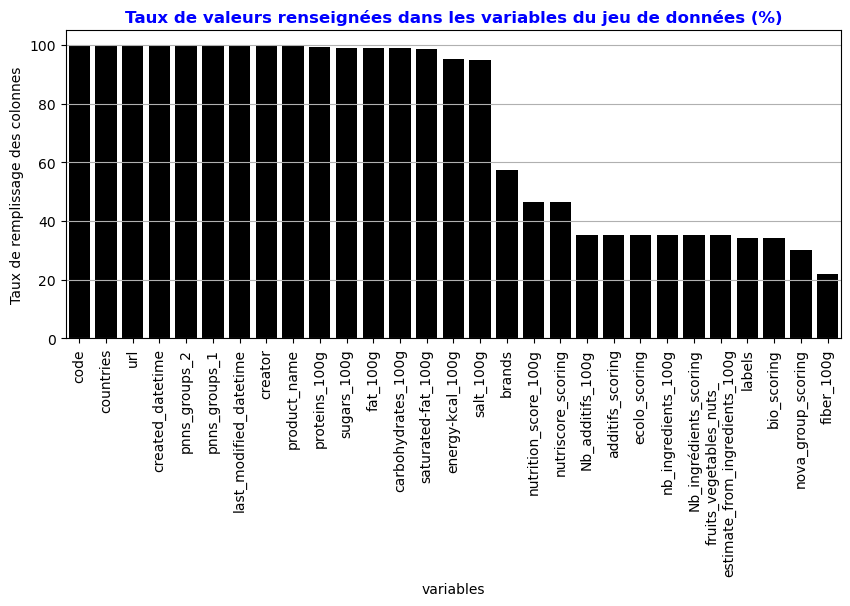

In [56]:
print_Taux_non_nuls(Taux_non_nuls(DF_final,seuil = 0),invert_xy = 'yes')